In [26]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [27]:
df = pd.read_csv('../../data/dataframes/df.csv')

In [28]:
dict_encoding = { "0:00" : 1,
                    "0:30" : 2,
                    "1:00" : 3,
                    "1:30" : 4,
                    "2:00" : 5,
                    "2:30" : 6,
                    "3:00" : 7,
                    "3:30" : 8,
                    "4:00" : 9,
                    "4:30" : 10,
                    "5:00" : 11,
                    "5:30" : 12,
                    "6:00" : 13,
                    "6:30" : 14,
                    "7:00" : 15,
                    "7:30" : 16,
                    "8:00" : 17,
                    "8:30" : 18,
                    "9:00" : 19,
                    "9:30" : 20,
                    "10:00" : 21,
                    "10:30" : 22,
                    "11:00" : 23, 
                    "11:30" : 24,
                    "12:00" : 25, 
                    "12:30" : 26, 
                    "13:00" : 27, 
                    "13:30" : 28, 
                    "14:00" : 29, 
                    "14:30" : 30, 
                    "15:00" : 31, 
                    "15:30" : 32, 
                    "16:00" : 33, 
                    "16:30" : 34, 
                    "17:00" : 35, 
                    "17:30" : 36, 
                    "18:00" : 37, 
                    "18:30" : 38, 
                    "19:00" : 39, 
                    "19:30" : 40, 
                    "20:00" : 41, 
                    "20:30" : 42, 
                    "21:00" : 43, 
                    "21:30" : 44, 
                    "22:00" : 45, 
                    "22:30" : 46, 
                    "23:00" : 47, 
                    "23:30" : 48
}
#replace the values of the column "timestamp" with the value of the dictionary
df['timestamp'] = df['timestamp'].map(dict_encoding)

#one hot encoding column h_type
df = pd.get_dummies(df, columns=['h_type'])
df

,timestamp,consommation,day,month,h_surface,nb_people,h_ref,h_type_A,h_type_M
0,1,0.7114,14,12,110,5,362,1,0
1,2,0.7147,14,12,110,5,362,1,0
2,3,0.9611,14,12,110,5,362,1,0
3,4,0.9352,14,12,110,5,362,1,0
4,5,0.8509,14,12,110,5,362,1,0
...,...,...,...,...,...,...,...,...,...
13465915,44,0.4626,1,1,50,2,15,1,0
13465916,45,0.4135,1,1,50,2,15,1,0
13465917,46,0.5193,1,1,50,2,15,1,0
13465918,47,0.3598,1,1,50,2,15,1,0


In [33]:
X = df.drop(['consommation', 'h_ref'], axis=1)
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

In [94]:
timestamp = df['timestamp'][:48].values.tolist()

In [35]:
conso_ref = df['consommation'][:48].values.tolist()

In [69]:
model = tf.keras.models.load_model('../../models/model2.h5')
list_pred = []
for i in range (1, 49):
    list_pred.append([i, 15, 12, 110, 5, 1, 0])

list_pred_norm = scaler.transform(list_pred)


/home/cytech/spie_project/spie-project/.SPIE/lib/python3.8/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
list_pred_norm

In [ ]:
conso_pred = model.predict(list_pred_norm)
conso_pred

In [72]:
encoding_ts = {1: "0:00", 
               2: "0:30", 
               3: "1:00", 
               4: "1:30", 
               5: "2:00", 
               6: "2:30", 
               7: "3:00", 
               8: "3:30", 
               9: "4:00", 
               10: "4:30", 
               11: "5:00", 
               12: "5:30", 
               13: "6:00", 
               14: "6:30", 
               15: "7:00", 
               16: "7:30", 
               17: "8:00", 
               18: "8:30", 
               19: "9:00", 
               20: "9:30", 
               21: "10:00", 
               22: "10:30", 
               23: "11:00", 
               24: "11:30", 
               25: "12:00", 
               26: "12:30", 
               27: "13:00", 
               28: "13:30", 
               29: "14:00", 
               30: "14:30", 
               31: "15:00", 
               32: "15:30", 
               33: "16:00", 
               34: "16:30", 
               35: "17:00", 
               36: "17:30", 
               37: "18:00", 
               38: "18:30", 
               39: "19:00", 
               40: "19:30", 
               41: "20:00", 
               42: "20:30", 
               43: "21:00", 
               44: "21:30", 
               45: "22:00", 
               46: "22:30", 
               47: "23:00", 
               48: "23:30"}

In [96]:
timestamp = [encoding_ts[i] for i in timestamp]

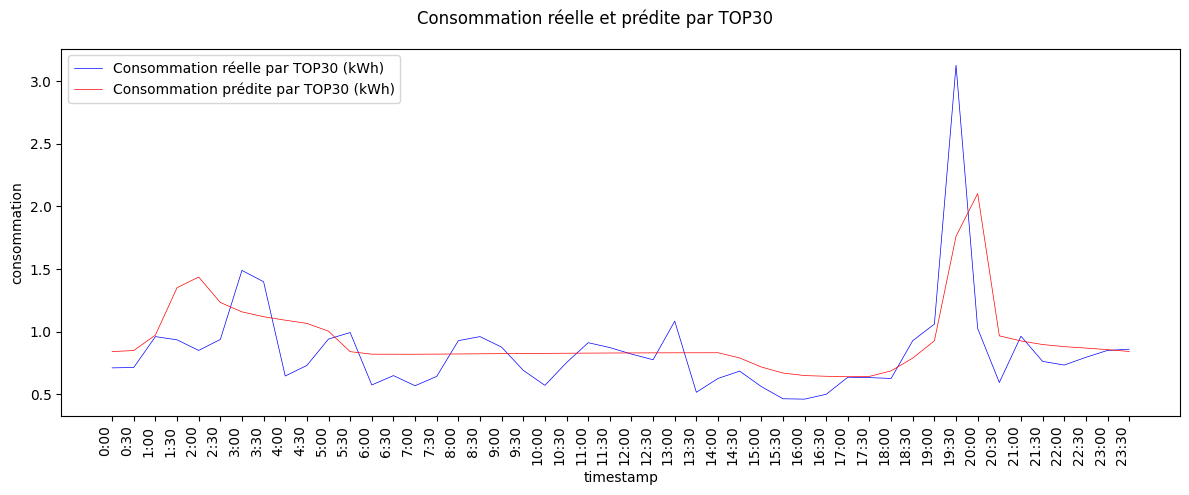

In [100]:
fig, ax = plt.subplots()
ax.plot(timestamp, conso_ref, label='Consommation réelle par TOP30 (kWh)', color='blue', linewidth=0.5)
ax.plot(timestamp, conso_pred, label='Consommation prédite par TOP30 (kWh)', color='red', linewidth=0.5)
ax.legend(loc='upper left')
ax.set_xlabel('timestamp')
ax.set_ylabel('consommation')
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
fig.set_size_inches(12, 5)
fig.suptitle('Consommation réelle et prédite par TOP30')
fig.tight_layout()
fig.show()